# Analysing CRAN code

- [Tidy Tuesday site](https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-11-12)
- [David Robinson's approach](https://www.youtube.com/watch?v=dr4qw8o0nYU)

## My code (after 1 hour)

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

%load_ext lab_black

In [117]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-11-12/loc_cran_packages.csv"
)

In [119]:
print(df.shape)
df.head()

(34477, 7)


,file,language,blank,comment,code,pkg_name,version
0,2,R,96,353,365,A3,1.0.0
1,1,HTML,347,5,2661,aaSEA,1.0.0
2,23,R,63,325,676,aaSEA,1.0.0
3,3,HTML,307,9,1275,abbyyR,0.5.5
4,30,R,224,636,587,abbyyR,0.5.5


In [120]:
df.describe()

,file,blank,comment,code
count,34477.000000,34477.000000,34477.000000,3.447700e+04
mean,11.165821,257.097775,432.708820,1.506400e+03
std,66.075754,2011.333988,2814.100058,1.255484e+04
min,1.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,17.000000,1.000000,8.300000e+01
50%,3.000000,53.000000,33.000000,3.360000e+02
75%,10.000000,174.000000,284.000000,1.043000e+03
max,10737.000000,310945.000000,304465.000000,1.580460e+06


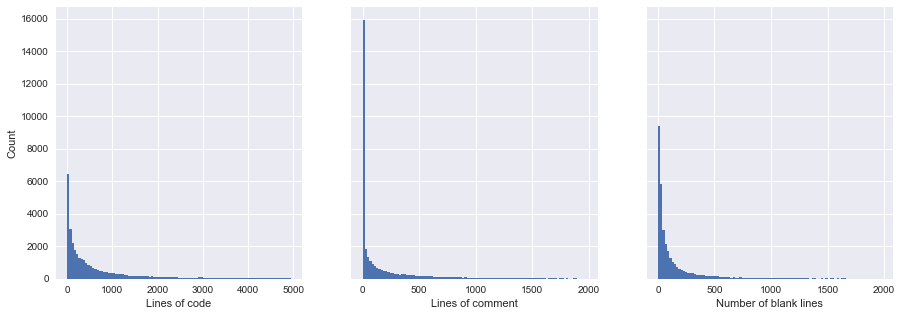

In [121]:
# Distribution of lines of code, comment, and empty lines

fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

df["code"].hist(bins=np.arange(0, 5000, 50), ax=ax0)
ax0.set_xlabel("Lines of code")
ax0.set_ylabel("Count")

df["comment"].hist(bins=np.arange(0, 2000, 20), ax=ax1)
ax1.set_xlabel("Lines of comment")

df["blank"].hist(bins=np.arange(0, 2000, 20), ax=ax2)
ax2.set_xlabel("Number of blank lines")

Text(0.5, 0, 'Number of packages')

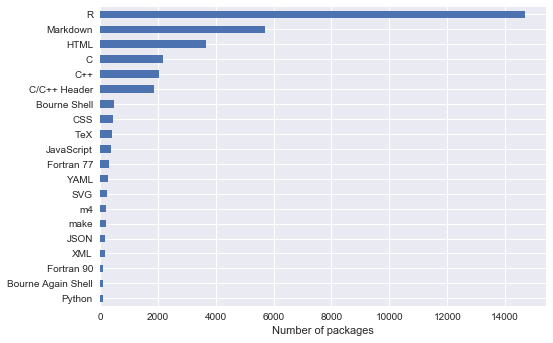

In [124]:
# Number of packages by language

counts = df["language"].value_counts().head(20)
counts.sort_values(ascending=True).plot(kind="barh")
plt.xlabel("Number of packages")

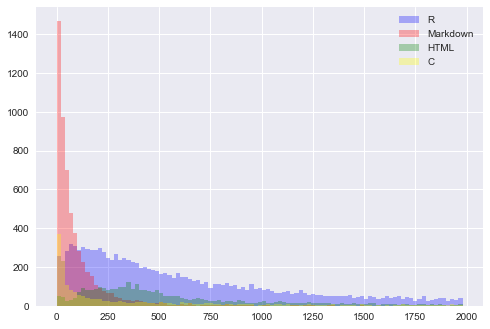

In [125]:
# Distributions of code length by language

top = counts.head(4)
colors = ["blue", "red", "green", "yellow"]

for idx, lang in enumerate(top.index):
    data = df[df["language"] == lang]
    data["code"].hist(
        bins=np.arange(0, 2000, 20), alpha=0.3, label=lang, color=colors[idx]
    )
plt.legend()

## David Robinson's approach

In [126]:
print(df.shape)
df.head()

(34477, 7)


,file,language,blank,comment,code,pkg_name,version
0,2,R,96,353,365,A3,1.0.0
1,1,HTML,347,5,2661,aaSEA,1.0.0
2,23,R,63,325,676,aaSEA,1.0.0
3,3,HTML,307,9,1275,abbyyR,0.5.5
4,30,R,224,636,587,abbyyR,0.5.5


In [140]:
# Summary stats

by_language = (
    df.groupby("language")
    .agg(
        packages=("code", "count"),
        code=("code", "sum"),
        comment=("comment", "sum"),
        files=("file", "sum"),
    )
    .assign(
        lines_per_package=lambda df: df.code / df.packages,
        files_per_package=lambda df: df.files / df.packages,
        code_code_ratio=lambda df: df.code / df.comment,
    )
    .sort_values("packages", ascending=False)
    .head(10)
)
by_language

,packages,code,comment,files,lines_per_package,files_per_package,code_code_ratio
language,,,,,,,
R,14689,22822548,9414210,267967,1553.716931,18.242699,2.424266
Markdown,5710,636948,1,9036,111.549562,1.582487,636948.000000
HTML,3680,4293856,32783,7893,1166.808696,2.144837,130.978129
C,2162,4764598,1171456,13540,2203.791859,6.262720,4.067245
C++,2041,3957771,817848,16442,1939.133268,8.055855,4.839250
C/C++ Header,1867,5898801,1960911,42153,3159.507766,22.577933,3.008194
Bourne Shell,500,875560,132514,1056,1751.120000,2.112000,6.607302
CSS,459,536705,12581,1555,1169.291939,3.387800,42.659963
TeX,401,357252,55114,1435,890.902743,3.578554,6.482055


Text(0.5, 0, 'Number of packages written in langauge')

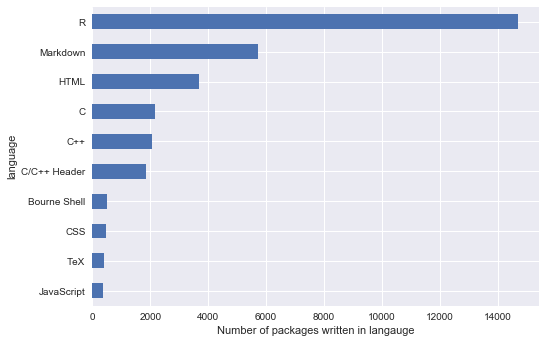

In [139]:
# Plot number of packages by language

by_language["packages"].sort_values(ascending=True).plot(kind="barh")
plt.xlabel("Number of packages written in langauge")